# MNIST: SIMPLE Machine Learning algorithms

<hr>

In [1]:
# import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("dataset/train.csv")

test_df = pd.read_csv("dataset/test.csv")

In [3]:
train_df.shape

(42000, 785)

In [4]:
test_df.shape

(28000, 784)

In [5]:
train_df.sample(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21643,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38664,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14560,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4667,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1895,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

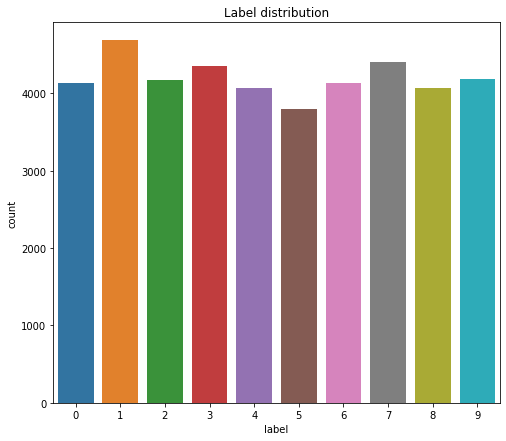

In [8]:
# Let's see the class distribution balanced or not

plt.figure(figsize=(8,7))
sns.countplot(x="label", data=train_df)
plt.title("Label distribution")
plt.show()

In [11]:
all_digits = train_df.drop(labels=['label'], axis=1).values

all_label = train_df['label'].values

In [12]:
all_digits.shape

(42000, 784)

In [13]:
all_digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
all_digits.max(), all_digits.min()

(255, 0)

In [16]:
all_label.max(), all_label.min()

(9, 0)

In [17]:
# Normalize the pixel value

all_digits = all_digits / 255.

all_digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
all_digits.max(), all_digits.min()

(1.0, 0.0)

In [19]:
all_digits[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
all_digits[0].shape

(784,)

In [24]:
all_digits[0].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
print(all_digits[0].reshape(28, 28).shape)

(28, 28)


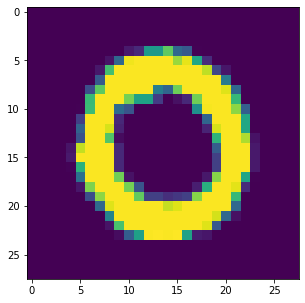

In [28]:
plt.figure(figsize=(7,5))
plt.imshow(all_digits[1].reshape(28, 28))
plt.show()

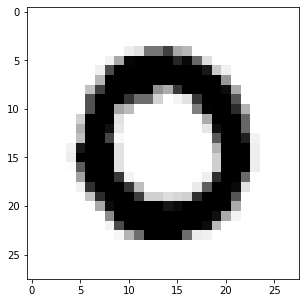

In [29]:
plt.figure(figsize=(7,5))
plt.imshow(all_digits[1].reshape(28, 28), cmap="binary")
plt.show()

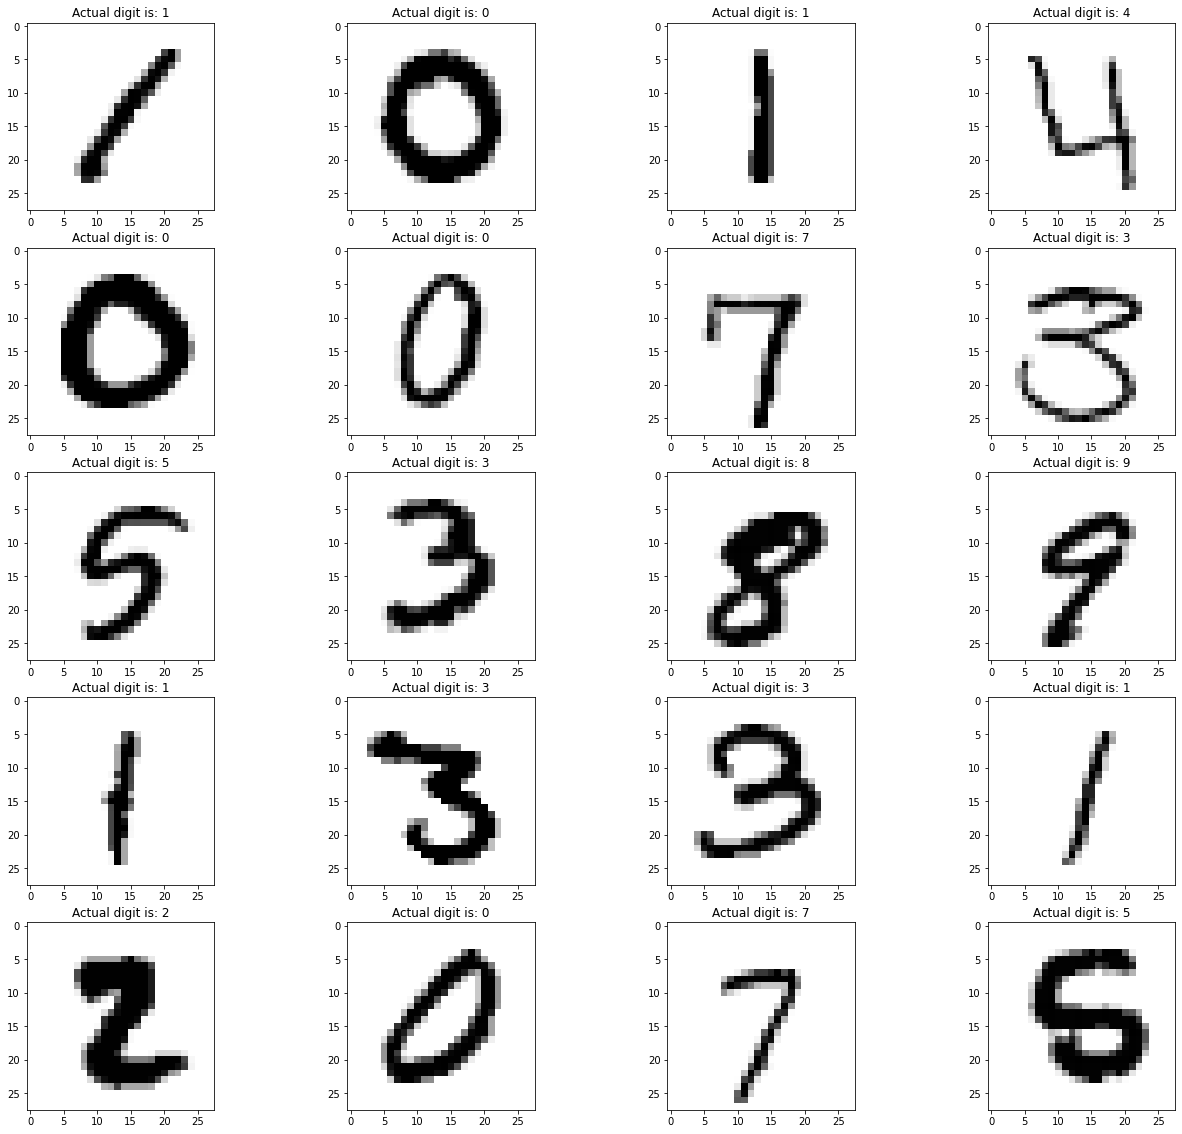

In [31]:
# Show some digits

# nrows = 5, ncols = 4

fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(all_digits[i].reshape(28, 28), cmap="binary")
    ax.set(title="Actual digit is: {}".format(all_label[i]))

In [32]:
X = all_digits.copy()

y = all_label.copy()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
# Split the dataset training and test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [36]:
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (33600, 784)
X_test shape:  (8400, 784)
y_train shape:  (33600,)
y_test shape:  (8400,)


# Let's create Model

<hr>

## 1) RandomForestClassifier

In [39]:
model1 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)

In [40]:
model1.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [41]:
y_pred1 = model1.predict(X=x_test)

In [43]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred1)

print("Model accuracy is: {:.3f}%".format(rf_accuracy*100))

Model accuracy is: 94.881%


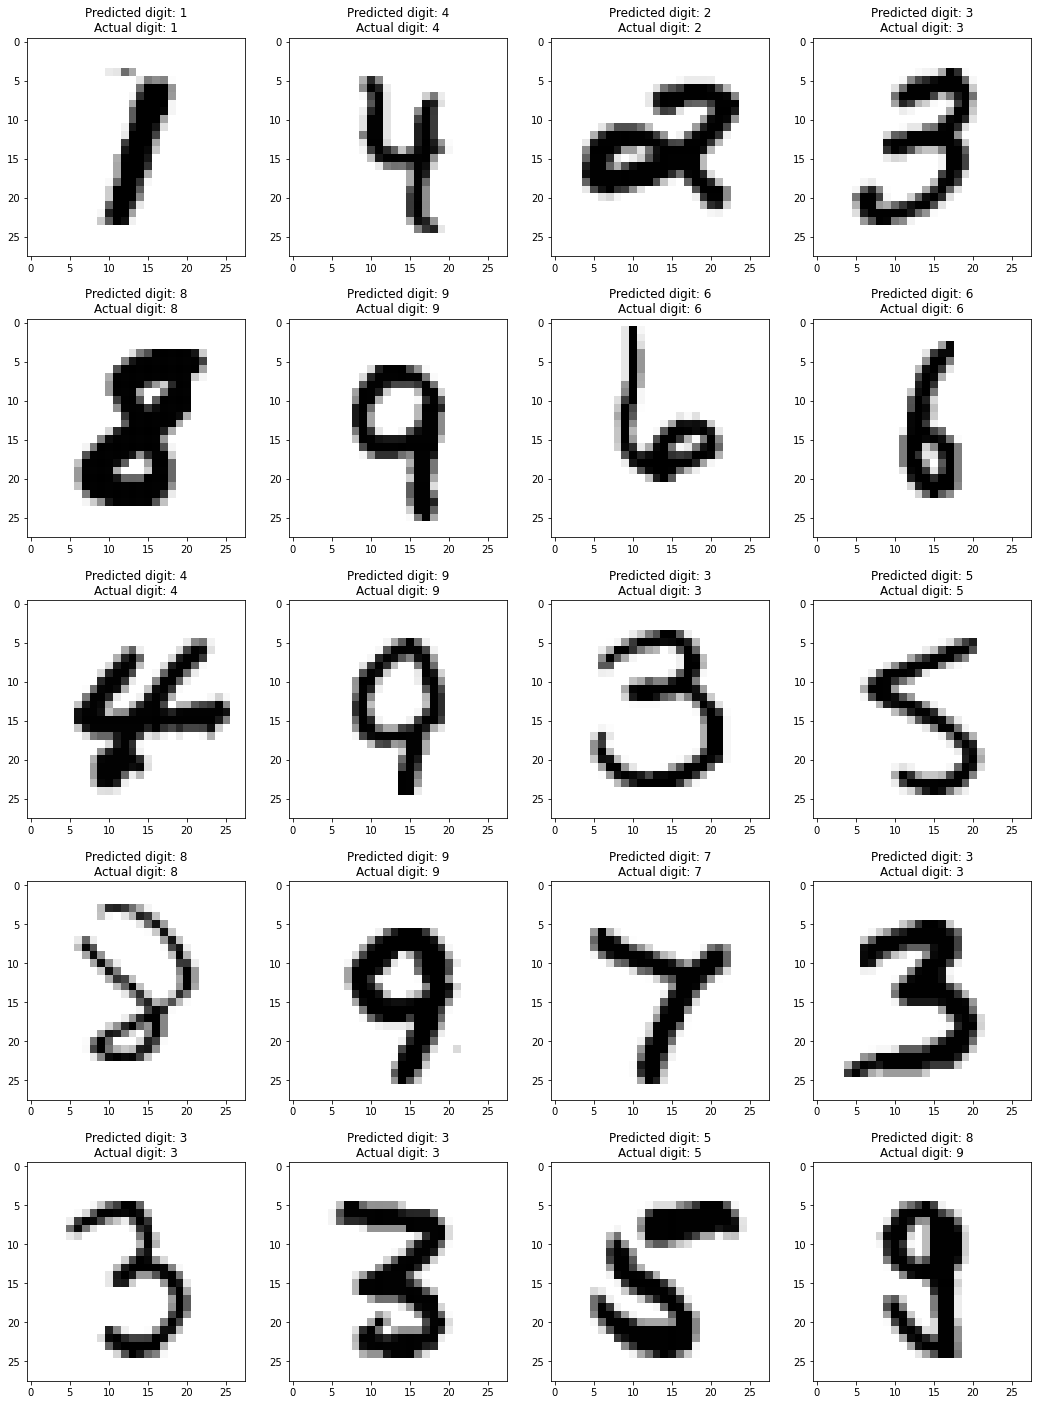

In [51]:
# compare our result

fig, axis = plt.subplots(5, 4, figsize=(18,25))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(28,28), cmap="binary")
    ax.set(title="Predicted digit: {0}\nActual digit: {1}".format(y_pred1[i], y_test[i]))

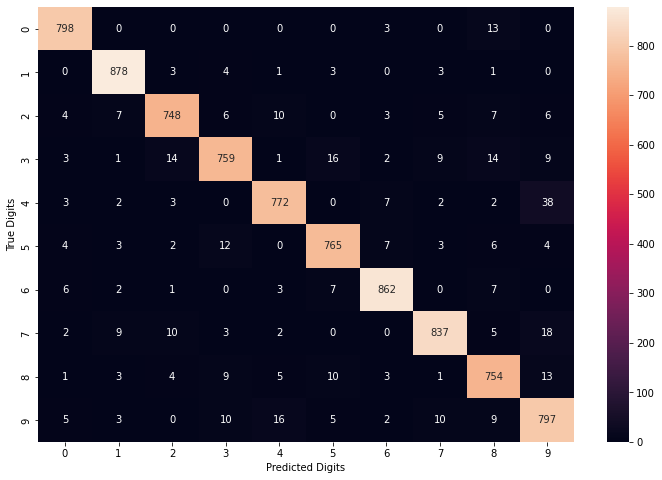

In [53]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred1)

plt.figure(figsize=(12, 8))
sns.heatmap(data=cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

### Submission

In [54]:
test_df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
test_x = test_df.values / 255.

In [56]:
test_pred = model1.predict(X=test_x)

In [58]:
test_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [57]:
submission = pd.read_csv("dataset/sample_submission.csv")

submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### Make submission file

In [59]:
submission['Label'] = test_pred

In [60]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [61]:
# Save the submission file

# submission.to_csv("dataset/submission.csv", index=False)